In [44]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
IMAGE_SIZE = 256
CHANNELS = 3


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10, #degree of rotation
)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
    save_to_dir = 'AugmentedImages'
)

Found 1506 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break
    

[[[0.59925646 0.5835702  0.6384722 ]
  [0.6034082  0.58772194 0.6426239 ]
  [0.6075599  0.59187365 0.6467756 ]
  ...
  [0.5668676  0.55902445 0.6139264 ]
  [0.580673   0.57282984 0.6277318 ]
  [0.60980004 0.6019569  0.6568589 ]]

 [[0.5378164  0.52213013 0.5770321 ]
  [0.5402586  0.5245723  0.5794743 ]
  [0.54270077 0.5270145  0.58191645]
  ...
  [0.5661349  0.5582918  0.61319375]
  [0.58189404 0.5740509  0.62895286]
  [0.6117539  0.6039107  0.6588127 ]]

 [[0.5037207  0.48803446 0.5429364 ]
  [0.50445336 0.48876712 0.54366904]
  [0.505186   0.48949975 0.5444017 ]
  ...
  [0.56540227 0.55755913 0.6124611 ]
  [0.5831151  0.57527196 0.6301739 ]
  [0.6137076  0.60586447 0.6607664 ]]

 ...

 [[0.6987813  0.6909382  0.74191856]
  [0.7093245  0.70148134 0.75246173]
  [0.70080024 0.6929571  0.7439375 ]
  ...
  [0.725026   0.7171829  0.77208483]
  [0.72453755 0.7166944  0.7715964 ]
  [0.72404915 0.716206   0.771108  ]]

 [[0.6995139  0.6916708  0.74265116]
  [0.7088361  0.70099294 0.75197333]


In [11]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10, #degree of rotation
)
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 215 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10, #degree of rotation
)
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 431 images belonging to 3 classes.


In [15]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'), #softmax normalizes prob. of classes
    
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [18]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy']
)

In [20]:
1506//32

47

In [21]:
215//32

6

In [32]:
epochs = 20

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch= 47,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 20,
    # patience = 1
    # callbacks=[early_stopping]
    )

Epoch 1/20
47/47 [==============================] - 94s 2s/step - loss: 0.9227 - accuracy: 0.4573 - val_loss: 0.8724 - val_accuracy: 0.4792
Epoch 2/20
47/47 [==============================] - 90s 2s/step - loss: 0.8461 - accuracy: 0.5414 - val_loss: 0.6968 - val_accuracy: 0.6771
Epoch 3/20
47/47 [==============================] - 90s 2s/step - loss: 0.6129 - accuracy: 0.7259 - val_loss: 0.5975 - val_accuracy: 0.7240
Epoch 4/20
47/47 [==============================] - 90s 2s/step - loss: 0.4278 - accuracy: 0.8263 - val_loss: 0.3511 - val_accuracy: 0.8594
Epoch 5/20
47/47 [==============================] - 90s 2s/step - loss: 0.3703 - accuracy: 0.8440 - val_loss: 0.3959 - val_accuracy: 0.8333
Epoch 6/20
47/47 [==============================] - 90s 2s/step - loss: 0.2665 - accuracy: 0.8935 - val_loss: 0.2292 - val_accuracy: 0.9010
Epoch 7/20
47/47 [==============================] - 90s 2s/step - loss: 0.2485 - accuracy: 0.9009 - val_loss: 0.2197 - val_accuracy: 0.8854
Epoch 8/20
47/47 [==

In [24]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 7s 486ms/step - loss: 0.2009 - accuracy: 0.9188


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

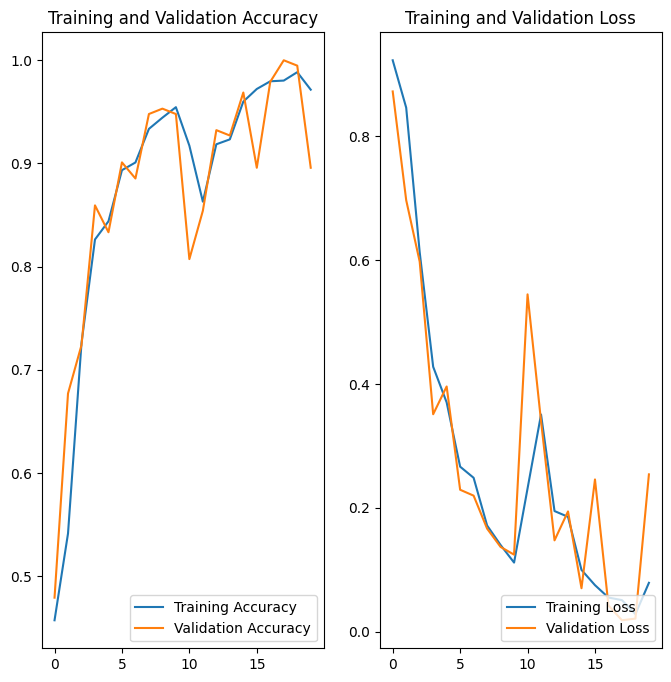

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')

In [55]:
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [56]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


KeyboardInterrupt: 

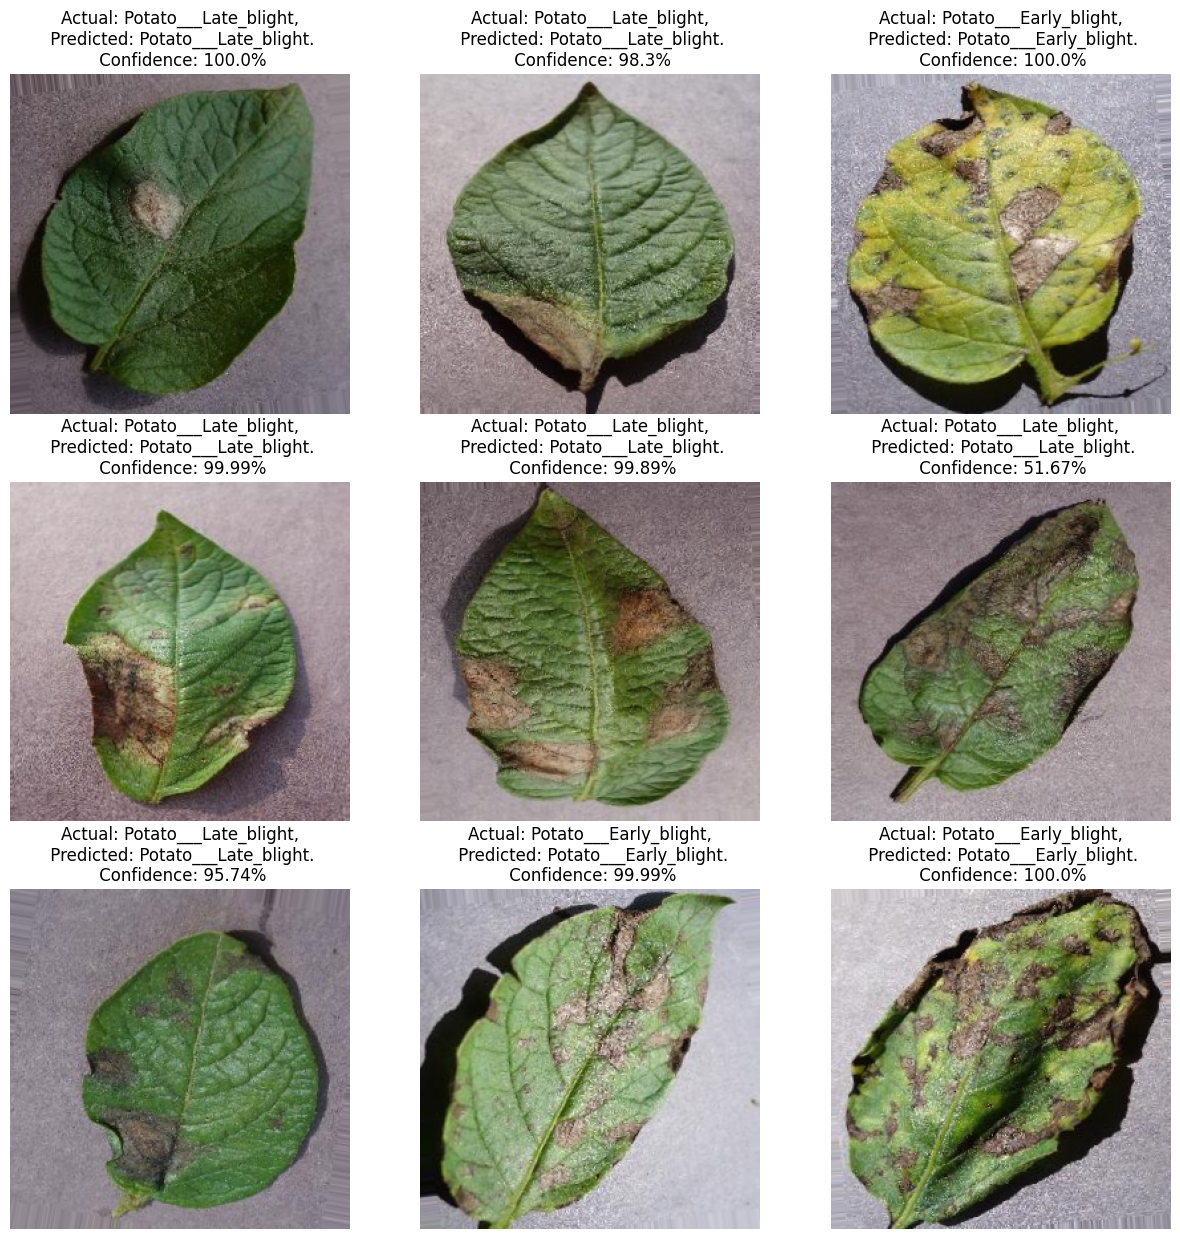

In [58]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [60]:
model.save('ImageGen.h5')